## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Table of Content</p>

* [1. Targeting Water Bodies - A reconstruction of Factors affecting water distribution](#2)
* [2. Problem Definition](#2)
* [3. Summary](#3)
* [4. Dataset Overview](#4)
* [5. Exploratory Data Analysis](#5)
    * [5.1 Aquifer Waterbodies](#5.1)
    * [5.2 Lake Waterbody](#5.2)
    * [5.3 River Waterbody](#5.3)
    * [5.4 Water Spring Waterbody](#5.4)     

* [6. Data Preprocessing](#6)
    * [6.1 Feature Selection](#6.1)
    * [6.2 Null Values Handling](#6.2)
    * [6.3 Null Values Imputation using LightGBM](#6.3)
    * [6.4 Stationarity Test](#6.4) 
* [7. Feature Engineering](#7)
* [8. Time-Series Forecasting](#8)
    * [8.1 LSTM](#8.1)
        * [8.1.1 Transforming Datasets for Multivariate LSTM Model](#8.1.1)
        * [8.1.2 Create LSTM Model](#8.1.2)
        * [8.1.3 Error Analysis](#8.1.3)
        * [8.1.4 Prediction Plots](#8.1.4)
* [9. Conclusion](#9)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as pl
from pylab import rcParams
import statsmodels.api as sm
import plotly.express as px
from datetime import date
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import warnings
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.titlesize': 'x-large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

pylab.rcParams.update(params)
pl.rcParams.update({'font.size': 16})

print(tf.__version__)

warnings.filterwarnings("ignore")
 
plt.style.use('seaborn-whitegrid')

<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">1. Targeting Water Bodies - A reconstruction of Factors affecting water distribution</p>

Water becomes not an essential commodity but one that is inextricably linked to the existence of basic life. Scarcity of water affects all life that exists in its vicinity. Because there have been efforts to even privatise water production and its availability, it is all the more important to address not only the environmental issues regaring water withdrawal but also the challenges faced by facetious corporations which treat water not as a basic human right but as a means of commerce. This analytical framework that we shall put forward will deal with water scarcity in a basin and its problematics. The emphasis would be to help Acea group to deal with the aforementioned problematics that arise in tandem with water preservation and the need for discourse surrounding the analyses of prediction as well as the groud realities reagarding the same.

In [ ]:
Aquifer_Auser = pd.read_csv('../input/acea-water-prediction/Aquifer_Auser.csv')
Aquifer_Doganella = pd.read_csv('../input/acea-water-prediction/Aquifer_Doganella.csv')
Aquifer_Luco = pd.read_csv('../input/acea-water-prediction/Aquifer_Luco.csv')
Aquifer_Petrignano = pd.read_csv('../input/acea-water-prediction/Aquifer_Petrignano.csv')
Lake_Bilancino = pd.read_csv('../input/acea-water-prediction/Lake_Bilancino.csv')
River_Arno  = pd.read_csv('../input/acea-water-prediction/River_Arno.csv')
Water_Spring_Amiata = pd.read_csv('../input/acea-water-prediction/Water_Spring_Amiata.csv')
Water_Spring_Lupa = pd.read_csv('../input/acea-water-prediction/Water_Spring_Lupa.csv')
Water_Spring_Madonna_di_Canneto = pd.read_csv('../input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv')

Aquifer_Auser['Date'] = pd.to_datetime(Aquifer_Auser['Date'], dayfirst=True)
Aquifer_Doganella['Date'] = pd.to_datetime(Aquifer_Doganella['Date'], dayfirst=True)
Aquifer_Luco['Date'] = pd.to_datetime(Aquifer_Luco['Date'], dayfirst=True)
Aquifer_Petrignano['Date'] = pd.to_datetime(Aquifer_Petrignano['Date'], dayfirst=True)
Lake_Bilancino['Date'] = pd.to_datetime(Lake_Bilancino['Date'], dayfirst=True)
River_Arno['Date'] = pd.to_datetime(River_Arno['Date'], dayfirst=True)
Water_Spring_Amiata['Date'] = pd.to_datetime(Water_Spring_Amiata['Date'], dayfirst=True)
Water_Spring_Lupa['Date'] = pd.to_datetime(Water_Spring_Lupa['Date'], dayfirst=True)
Water_Spring_Madonna_di_Canneto['Date'] = pd.to_datetime(Water_Spring_Madonna_di_Canneto['Date'], dayfirst=True)

Aquifer_Auser_target = ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_LT2']
Aquifer_Doganella_target = ['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2','Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4','Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6','Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8','Depth_to_Groundwater_Pozzo_9']
Aquifer_Luco_target = ['Depth_to_Groundwater_Podere_Casetta']
Aquifer_Petrignano_target = ['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']
Lake_Bilancino_target = ['Lake_Level', 'Flow_Rate']
River_Arno_target = ['Hydrometry_Nave_di_Rosano']
Water_Spring_Amiata_target = ['Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']
Water_Spring_Lupa_target = ['Flow_Rate_Lupa']
Water_Spring_Madonna_di_Canneto_target = ['Flow_Rate_Madonna_di_Canneto']

dataset = ['Aquifer_Auser','Aquifer_Doganella','Aquifer_Luco','Aquifer_Petrignano','Lake_Bilancino','River_Arno','Water_Spring_Amiata','Water_Spring_Lupa','Water_Spring_Madonna_di_Canneto']
all_data = [Aquifer_Auser,Aquifer_Doganella,Aquifer_Luco,Aquifer_Petrignano,Lake_Bilancino,River_Arno,Water_Spring_Amiata,Water_Spring_Lupa,Water_Spring_Madonna_di_Canneto]
all_data_target = [Aquifer_Auser_target,Aquifer_Doganella_target,Aquifer_Luco_target,Aquifer_Petrignano_target,Lake_Bilancino_target,River_Arno_target,Water_Spring_Amiata_target,Water_Spring_Lupa_target,Water_Spring_Madonna_di_Canneto_target]


<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">2. Problem definition</p>

Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

The goal is to create a mathematical model, for each category of waterbody (acquifers, water springs, river, lake) to predict the amount of water in each unique waterbody for a set time interval. The predictive power of the models shall be evaluated with both Mean Absolute Error (MAE) and Root Mean Square Error (RMSE).

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">3. Summary</p>

The locus of our survey that arises out of the data available to us would put forward not one but multiple exploratory branches, the first of which would mean to overview dataset features affecting water bodies and target variables that have to be predicted. The second spear point of perception would be exploratory data analysis containing correlation matrix, Null values analysis and stationarity test as time-series are time-dependant and show specific characteristics, such as trend and seasonality. Right at the end of this particular train of thought we find ourselves in a space where data preprocessing which includes filling of Null values, feature selection and exterminating the old data is done efficiently. The method with which we will go forward in order to achieve and expand the implications of these objectives would be to create a model for prediction that will essentially enable a sub-model for future scope.

<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">4. Dataset Overview</p>

**List of All Target Attributes**

The target of a supervised model is a special kind of attribute. The target column in the training data contains the historical values used to train the model. The target column in the test data contains the historical values to which the predictions are compared.
Below is the  list of all target attributes which we will be using in future for predicting values of all datasets.

In [ ]:
import itertools
ab = itertools.chain(col for col in all_data_target)
all = list(ab)
all_targets = [item for sublist in all for item in sublist]
all_targets

Flow rate absolute value as per kaggle discussions

[https://www.kaggle.com/c/acea-water-prediction/discussion/205071](https://www.kaggle.com/c/acea-water-prediction/discussion/205071)

In [ ]:
Lake_Bilancino['Flow_Rate'] = Lake_Bilancino['Flow_Rate'].abs()
Water_Spring_Amiata['Flow_Rate_Bugnano'] = Water_Spring_Amiata['Flow_Rate_Bugnano'].abs()
Water_Spring_Amiata['Flow_Rate_Arbure'] = Water_Spring_Amiata['Flow_Rate_Arbure'].abs()
Water_Spring_Amiata['Flow_Rate_Ermicciolo'] = Water_Spring_Amiata['Flow_Rate_Ermicciolo'].abs()
Water_Spring_Amiata['Depth_to_Groundwater_David_Lazzaretti'] = Water_Spring_Amiata['Depth_to_Groundwater_David_Lazzaretti'].abs()
Water_Spring_Amiata['Flow_Rate_Galleria_Alta'] = Water_Spring_Amiata['Flow_Rate_Galleria_Alta'].abs()
Water_Spring_Lupa['Flow_Rate_Lupa'] = Water_Spring_Lupa['Flow_Rate_Lupa'].abs()
Water_Spring_Madonna_di_Canneto['Flow_Rate_Madonna_di_Canneto'] = Water_Spring_Madonna_di_Canneto['Flow_Rate_Madonna_di_Canneto'].abs()

Boxplot and Null values graph functions

In [ ]:
def box_plot(acea_df,acea_df_target):
  acea_df.replace(0, np.nan, inplace=True)
  acea_df.dropna(subset=['Date'],inplace=True)
  acea_df['year'] = [d.year for d in acea_df.Date]
  acea_df['month'] = [d.strftime('%b') for d in acea_df.Date]
  years = acea_df['year'].unique()
  for target in acea_df_target:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
    sns.boxplot(x='year', y=target, data=acea_df, ax=axes[0])
    sns.boxplot(x='month', y=target, data=acea_df.loc[~acea_df.year.isin([1998, 2020]), :])
    # Set Title
    axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
    plt.show()
  return acea_df

def nagraph(name,acea_df):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(40,20))
    sns.heatmap(acea_df.T.isna(), cmap='Blues')
    ax.set_title("Missing Values for "+name, fontsize=20)
    plt.show()

<a id='5'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">5. Exploratory Data Analysis</p>

In this section, we are going to explore the datasets.

Let's get a feeling about how many years of data we are looking at for each dataset. For the datasets for aquifer Auser, aquifer Luco, river Arno, and water spring Amiata, we have more than 20 years of data. On the other side, water spring Madonna only contains information about the past 8 years. We will be looking at indepentadant and target variables through visualizaition, correlation matrices for checking the extent of dependency of independent variables on target variables, total null values present in each dataset, statistical view for getting a good grasp of the type of data that exists in these columns. Additionally, we will be looking at boxplots in periods of years and months for checking trend and seasonality respectively if any.

Before moving on to the individual dataset analysis lets check if our data is in Chronological Order and is having Equidistant Timestamps.

The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval.

This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.

In [ ]:
Aquifer_Auser = Aquifer_Auser.sort_values(by='Date')

# Check time intervals
Aquifer_Auser['Time_Interval'] = Aquifer_Auser.Date - Aquifer_Auser.Date.shift(1)

Aquifer_Auser[['Date', 'Time_Interval']].head()


<a id='5.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">5.1 Aquifer Waterbody</p>

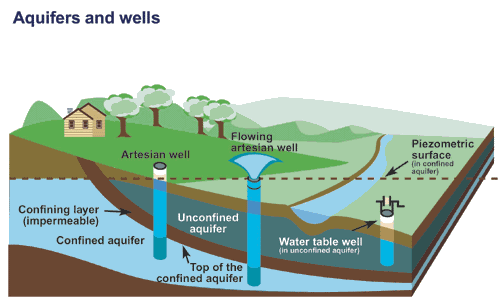

An aquifer is an underground layer of water-bearing permeable rock, rock fractures or unconsolidated materials. Groundwater can be extracted using a water well. We are having 4 datasets for 4 different aquifers. We will be only looking at only 1 dataset varaibles visualization (i.e Aquifer Doganella) but all other visualizations for all datasets have been shown below for better understnding of data.

Independent Attributes

In [ ]:
plt.figure(figsize=(40,100))
i=0
for col in all_data[1].columns:
  if col not in all_data_target[1]:
      plt.subplot(15,2, i+1)
      plt.plot(all_data[1].Date,all_data[1][col],'b.')
      plt.title(col)
      i=i+1
plt.show()

Target Attributes

In [ ]:
plt.figure(figsize=(40,100))
for i,col in enumerate(all_data_target[1]):
  plt.subplot(15,2, i+1)
  plt.plot(all_data[1].Date,all_data[1][col],'r.')
  plt.title(col)
plt.show()

In [ ]:
for i in range(0,4):
  print("Dataset Name - ",dataset[i])
  print("Target Attributes - ",all_data_target[i])
  print(all_data[i].describe())
  print(all_data[i].info())
  
  #Correlation Matric
  corrmat = all_data[i].corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(20,20))

  #plot heat map
  g=sns.heatmap(all_data[i][top_corr_features].corr(),annot=True,cmap="RdYlGn")
  plt.plot()

  #Box plot for Dependent Attributes
  all_data[i] = box_plot(all_data[i],all_data_target[i])
  plt.show()

  ## Null Values
  nagraph(dataset[i],all_data[i])

**Observations - **
1. Volumes of rainfall are quite volatile both across locations and at different times of the year. However, we cannot observe apparent seasonal patterns.

2. Volume of most of the wells of Pozzo are mostly constant with some fluctuations. Volume of Pozzo_1 and Pozzo_2 are quite volatile at different times of the year.

3. Temperatures seems mostly between 0°C and 30°C. In addition, the temperature shows a quite strong annual cycle.

4. Most of the target attributes are not following a pattern and some of them have drastic drops in data which is either missing data or some man-made reasons.

5. From Boxplots it is observed that Dependent attributes characterise partial seasonality.

6. From the missing values graph it can be observed that half of the values related to Depth_to_groundwater columns are having null values.



<a id='5.2'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">5.2 Lake Waterbody</p>

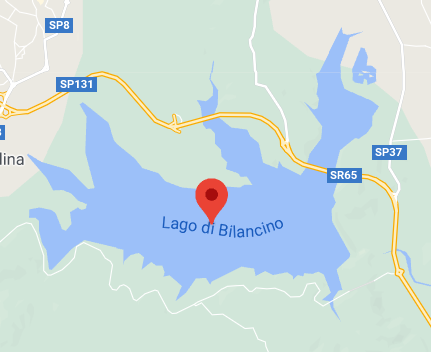


Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

Independent Attributes

In [ ]:
plt.figure(figsize=(40,100))
i=0
for col in all_data[4].columns:
  if col not in all_data_target[4]:
      plt.subplot(15,2, i+1)
      plt.plot(all_data[4].Date,all_data[4][col],'b.')
      plt.title(col)
      i=i+1
plt.show()

Target Attributes

In [ ]:
plt.figure(figsize=(40,100))
for i,col in enumerate(all_data_target[4]):
  plt.subplot(12,2, i+1)
  plt.plot(all_data[4].Date,all_data[4][col],'r.')
  plt.title(col)
plt.show()

In [ ]:
for i in range(4,5):
  print("Dataset Name - ",dataset[i])
  print("Target Attributes - ",all_data_target[i])
  print(all_data[0].describe())
  print(all_data[0].info())
  
  corrmat = all_data[i].corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(20,20))
  #plot heat map
  g=sns.heatmap(all_data[i][top_corr_features].corr(),annot=True,cmap="RdYlGn")
  plt.plot()
  all_data[i] = box_plot(all_data[i],all_data_target[i])
  plt.show()
  nagraph(dataset[i],all_data[i])

**Observations -**
1.    Volumes of rainfall are quite volatile across all locations and at different times of the year. However, we cannot observe apparent seasonal patterns.

2.    Temperatures seems mostly between 0°C and 30°C. In addition, the temperature shows quite a strong annual cycle.

3.    The Lake level shows quite a strong annual cycle. In addition, it seems the lake level dropped drastically (2012-2013). Given the starting and ending dates, it seems environmentally natural and unnatural processes affected the level of the lake.

4. From Boxplots it is observed that Dependent attribute characterizes seasonality.

5. From missing values graph it is observed that most of the values related to rainfall columns have null values.



<a id='5.3'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">5.3 River Waterbody</p>

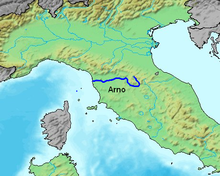

The Arno is a river in the Tuscany region of Italy. It is the most important river of central Italy after the Tiber. With a length of 241 kilometres (150 mi), it is the largest river in the region. It has many tributaries: Sieve at 60 kilometres (37 mi) long, Bisenzio at 49 kilometres (30 mi), Ombrone Pistoiese at 47 kilometres (29 mi), and the Era, Elsa, Pesa, and Pescia. The drainage basin amounts to more than 8,200 square kilometres (3,200 sq mi).

The main indicator that will be predicted for the river is hydrometry. The other two features in this dataset are rainfall and temperature. 

Independent Attributes

In [ ]:
plt.figure(figsize=(40,100))
i=0
for col in all_data[5].columns:
  if col not in all_data_target[5]:
      plt.subplot(12,2, i+1)
      plt.plot(all_data[5].Date,all_data[5][col],'b.')
      plt.title(col)
      i=i+1
plt.show()

Target Attributes

In [ ]:
plt.figure(figsize=(40,100))
for i,col in enumerate(all_data_target[5]):
  plt.subplot(12,2, i+1)
  plt.plot(all_data[5].Date,all_data[5][col],'r.')
  plt.title(col)
plt.show()

In [ ]:
for i in range(5,6):
  print("Dataset Name - ",dataset[i])
  print("Target Attributes - ",all_data_target[i])
  print(all_data[i].describe())
  print(all_data[i].info())
  
  corrmat = all_data[i].corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(20,20))
  #plot heat map
  g=sns.heatmap(all_data[i][top_corr_features].corr(),annot=True,cmap="RdYlGn")
  plt.plot()
  all_data[i] = box_plot(all_data[i],all_data_target[i])
  plt.show()
  nagraph(dataset[i],all_data[i])

**Observations** -

1. Volumes of rainfall are quite volatile both across locations and at different times of the year. However, we cannot observe apparent seasonal patterns.

2. Temperatures seems mostly between 0°C and 30°C. In addition, the temperature shows quite a strong annual cycle.

3. The hydrometry shows quite a strong annual cycle. In addition, it seems that the river did stop flow between July 3, 2008 and December 31, 2008. Given the starting and ending dates, it seems either missing data or some man-made reasons had halted the river flow.

4. From correlation matrix it is observed that Hydrometry is highly correlated with Temperature Attribute.

5. From Boxplots it is observed that Dependent attribute characterizes seasonality.

6. From missing values graph it is observed that most of the values related to rainfall columns have null values.



<a id='5.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">5.4. Water Spring Waterbody</p>

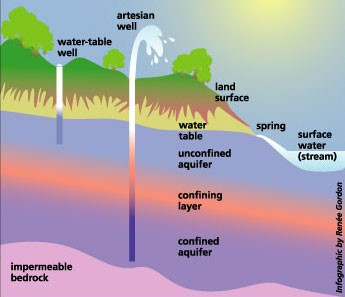

A spring is a place where water moving underground finds an opening to the land surface and emerges, sometimes as just a trickle, maybe only after a rain, and sometimes in a continuous flow.
We will be only looking at only 1 dataset varaibles visualization (i.e water spring spring amiata) but all other visualizations for all datasets have been shown below for better understnding of data.

Independent Attributes

In [ ]:
plt.figure(figsize=(40,100))
i=0
for col in all_data[6].columns:
  if col not in all_data_target[6]:
      plt.subplot(12,2, i+1)
      plt.plot(all_data[6].Date,all_data[6][col],'b.')
      plt.title(col)
      i=i+1
plt.show()

Target Attributes

In [ ]:
plt.figure(figsize=(40,100))
for i,col in enumerate(all_data_target[6]):
  plt.subplot(12,2, i+1)
  plt.plot(all_data[6].Date,all_data[6][col],'r.')
  plt.title(col)
plt.show()

In [ ]:
for i in range(6,9):
  print("Dataset Name - ",dataset[i])
  print("Target Attributes - ",all_data_target[i])
  print(all_data[i].describe())
  print(all_data[i].info())
  
  corrmat = all_data[i].corr()
  top_corr_features = corrmat.index
  plt.figure(figsize=(20,20))
  #plot heat map
  g=sns.heatmap(all_data[i][top_corr_features].corr(),annot=True,cmap="RdYlGn")
  plt.plot()
  all_data[i] = box_plot(all_data[i],all_data_target[i])
  plt.show()
  nagraph(dataset[i],all_data[i])

**Observations -**
1.    Volumes of rainfall are quite volatile across all locations and at different times of the year. However, we cannot observe apparent seasonal patterns.
2.    Temperatures for all locations seems mostly between 0°C and 30°C. In addition, the temperature shows quite a strong annual cycle.
3.    Target attributes are also quite volatile across all locations and at different times of the year. However, we cannot observe apparent seasonal patterns.

5. From Boxplots it is observed that Dependent attribute characterizes partial seasonality.

6. From missing values graph it is observed that most of the values in columns have null values.



<a id=''></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">6. Data Preprocessing</p>

<a id='6.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">6.1. Feature Selection</p>


By observing above visualizations of null values of all datasets, we came to the conclusion that many of the datasets that had concentrated null values in past times are not healthy for our model, so, we selected specific years for each dataset, such that the dataset of the initial year would be the starting point of our analysis and all data before that will be expunged.


In [ ]:
year_to_select =  [2011,2017,2017,2009,2004,2004,2016,2011,2017]
def select_dates(acea_df,year):
    acea_df['year'] = pd.DatetimeIndex(acea_df['Date']).year 
    acea_df = acea_df[acea_df.year>year-1]
    acea_df.replace(0, np.nan,inplace=True) 
    return acea_df

for i,(acea_df,year) in enumerate(zip(all_data,year_to_select)):
  all_data[i] = select_dates(acea_df,year)

<a id='6.2'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">6.2. Null Values Handling</p>

We are dropping columns from all datasets having more than 20 percent null values.
Also we are dropping multiple columns for aquifer_auser, aquifer_dogenella and Water_Spring_Amiata because as we observed above in correlation matrix these columns have negligible to no effects on target values.

In [ ]:
all_data[0].drop(['Volume_POL','Volume_CC1'],axis=1,inplace=True)
all_data[1].drop(['Volume_Pozzo_1'],axis=1,inplace=True)
all_data[6].drop(['Temperature_Abbadia_S_Salvatore','Temperature_S_Fiora','Temperature_Laghetto_Verde'],axis=1,inplace=True)

In [ ]:
all_data[6].isnull().mean()

We will also be removing Independent Attributes having Null values more than 20 percent of the remaining datasets even after the datasets were shortened because of the removal of old data which was achieved through year selection.

In [ ]:
for i in range(len(all_data)):
  for cols in all_data[i].columns:
    if cols not in all_data_target[i] and all_data[i][cols].isnull().mean() > 0.2:
        all_data[i].drop([cols],axis=1,inplace=True)
        
  print(all_data[i].columns)


<a id='6.3'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">6.3. Null Values Imputation using LightGBM</p>

As a preprocessing step of the data, we will fill the NaN values and replace the implausible values as well. First, the implausible values consisting 0 will be replaced with NaN values. Then all NaN values will be filled through prediction. For this, we will build a small prediction model.

We will be using LightGBM for Null values Imputation. We will be creating additional time realated features for LightGBM model which will be then used along with feature to be imputed and perform train-test split for null values prediction.

In [ ]:
def data_impute(acea_df,acea_df_target):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error
    import lightgbm as lgb

    features_to_fill = acea_df.columns[:-1]
    temp_df = acea_df[features_to_fill].copy()

    # Create time related features
    temp_df['year'] = pd.DatetimeIndex(temp_df['Date']).year 

    temp_df['month'] = pd.DatetimeIndex(temp_df['Date']).month 
    month_in_year = 12
    temp_df['month_sin'] = np.sin(2*np.pi*temp_df.month/month_in_year)
    temp_df['month_cos'] = np.cos(2*np.pi*temp_df.month/month_in_year)

    temp_df['season'] = temp_df.month%12 // 4 + 1

    temp_df['day_of_year'] = pd.DatetimeIndex(temp_df['Date']).dayofyear
    days_in_year = 365.25
    temp_df['day_of_year_sin'] = np.sin(2*np.pi*temp_df.day_of_year/days_in_year)
    temp_df['day_of_year_cos'] = np.cos(2*np.pi*temp_df.day_of_year/days_in_year)

    temp_df['week_of_year'] = pd.DatetimeIndex(temp_df['Date']).weekofyear
    weeks_in_year = 52.1429
    temp_df['week_of_year_sin'] = np.sin(2*np.pi*temp_df.week_of_year/weeks_in_year)
    temp_df['week_of_year_cos'] = np.cos(2*np.pi*temp_df.week_of_year/weeks_in_year)
    
    features = ['month_sin', 'month_cos', 'day_of_year_sin', 'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos', 'year', 'season']
    temp_df.drop(['month'],axis=1,inplace=True)
    i=1
    plt.figure(figsize=(40,200))
    for attribute in features_to_fill[1:]:
          if attribute in acea_df_target:
            clr = 'black'
          else:
            clr = 'blue'
          target = attribute
          X = temp_df[temp_df[attribute].notna()][features]#.reset_index(drop=True)
          y = temp_df[temp_df[attribute].notna()][target]#.reset_index(drop=True)
          X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

          X_test = temp_df[features]#.reset_index(drop=True)
          # Model
          params = {'num_leaves': 32,
                    'objective': 'regression_l1',
                    'max_depth': 8,
                    'learning_rate': 0.05,
                    "metric": 'mae',
                    'seed' : 42
                  }

          dtrain = lgb.Dataset(X_train, y_train)
          dvalid = lgb.Dataset(X_valid, y_valid)

          clf = lgb.train(params, dtrain, 5000, valid_sets = [dtrain, dvalid], verbose_eval=False,  early_stopping_rounds=100)

          y_pred_valid = clf.predict(X_valid)
          
          old = temp_df[attribute].copy()
          y_pred = clf.predict(X_test)
          #replacing of actual null values here
          acea_df[attribute] = np.where(acea_df[attribute].isna(), y_pred, acea_df[attribute])
          
          plt.subplot(20,2,i)
          sns.scatterplot(x=acea_df.index, y=acea_df[attribute], color='red',label='predicted')
          sns.scatterplot(x=acea_df.index, y=old.fillna(np.inf), color=clr, label = 'original')
          i=i+1
    plt.show()
    return acea_df

In [ ]:
for i,(name,acea_df,acea_df_target) in enumerate(zip(dataset,all_data,all_data_target)):
    print("Dataset for imputation - " + str(name))
    acea_df.reset_index(inplace = True, drop = True) 
    all_data[i] = data_impute(acea_df,acea_df_target)

Remove date and month columns from all datasets because it is not needed for prediction.

In [ ]:
for i,(acea_df,year) in enumerate(zip(all_data,year_to_select)):
  try:
        all_data[i].drop(['Date','month'],axis=1,inplace=True)
  except:
        all_data[i].drop(['Date'],axis=1,inplace=True)


<a id='6.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">6.4. Stationarity Test</p>

Using non-stationary time series data in forecasting models produces unreliable and spurious results that leads to poor understanding and forecasting. The solution to the problem is to transform the time series data so that it becomes stationary. ADF and KPSS are quick stationary statistical tests to understand the data you are dealing with.
Most statistical forecasting methods are based on the assumption that the time series are approximately stationary. A stationary series is relatively easy to predict: you simply forecast that its statistical properties will be the same in the future as they have been in the past. Analysis of time series patterns is the first step of converting non-stationary data in to stationary data (for example by trend removal), so that the statistical forecasting methods could be applied. There are three fundamental steps of building a quality forecasting time series model: making the data stationary, selecting the right model, and evaluating model accuracy.

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

**Stationarity Test for Aquifer_auser**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[0].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[0][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for Aquifer_doganella**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[1].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[1][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
plt.show()

**Stationarity Test for Aquifer_luco**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[2].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[2][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for Aquifer_patrignano**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[3].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[3][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for Lake_Bilancino**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[4].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[4][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for River_arno**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[5].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[5][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for Water_Spring_Amiata**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[6].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[6][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for Water_spring_lupa**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[7].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[7][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

**Stationarity Test for Water_Spring_Madonna_di_Canneto**

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(all_data[8].columns):
    plt.figure(figsize=(60,20))
    if col=='Date':
      continue
    series = all_data[8][col].values
    i=1
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'

    plt.subplot(10,3,i)
    plt.plot(series, color=linecolor)
    i=i+1
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=str(col), fontsize=14)
    plt.show()

(Nans and inf not allowed)
more negative the value the more likely we are to reject null hypothesis(stationary)

<a id='7'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">7. Feature Engineering</p>

**Create Additional Features containing rolling averages**

A moving average, also called a rolling or running average, is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.

For calculating succeeding rolling average values, a new value will be added into the sum, and the previous time period value will be dropped out, since you have the average of previous time periods so full summation each time is not required:

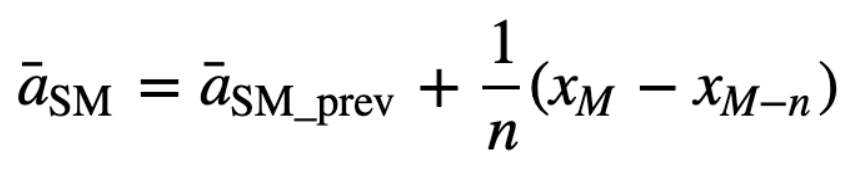

Adding Features consiting of Rolling Average of 7 days for better model accuracy(smootherns dataset) whilst keeping original attributes.

In [ ]:
def add_feat(acea_df):
  i=0
  plt.figure(figsize=(40,100))
  for cols in acea_df.columns:
    acea_df[cols+'_roll'] = acea_df[cols].rolling(7).sum()
    plt.subplot(20,2, i+1)
    plt.plot(acea_df[cols+'_roll'])
    plt.title(str(cols)+'_roll') 
    i=i+1
  plt.show()
  acea_df.dropna(axis=0,inplace=True)
  return acea_df

for i,(name,acea_df,acea_df_target) in enumerate(zip(dataset,all_data,all_data_target)):
    print("Dataset for Feature Engineering - " + str(name))
    all_data[i] = add_feat(acea_df)

<a id='8'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">8. Time Series Forecasting Model</p>


Now, we are going to understand the deeper behaviour of our time series and how they depend and influence each other in order to establish the proper model.

Remember, we want to create a robust model to predict target attributes of all datasets. A Multivariate Time Series will analyse how much the time series depend on each other. It will add information towards a more robust and precise Time-Series forecasting model.

We want to find the variables we will use in our future model. We don't want to use variables that are not significant in the forecasting because it can skew our model.

<a id='8.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">8.1 LSTM</p>

LSTM has the advantage of capturing temporal information and is popular to be adopted in time series modeling. Detailed structure of the LSTM block is illustrated in Figure

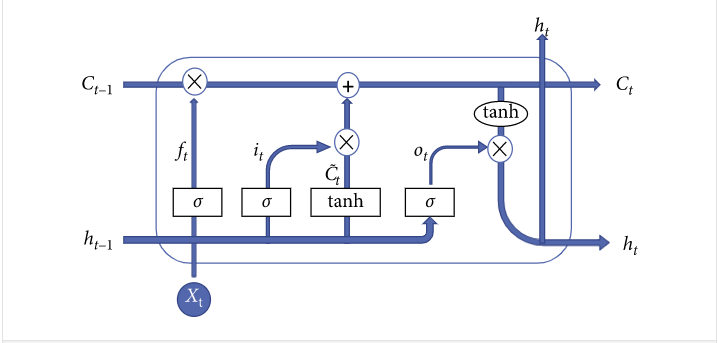

The input of LSTM block is X(t). Then, the output of hidden layer, namely, the current hidden state h(t), is computed as follows:

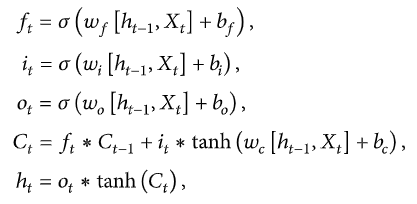

We are going to use a multi-layered LSTM recurrent neural network to predict the last value of a sequence of values.

The following data pre-processing and feature engineering need to be done before construct the LSTM model.

Create the dataset, ensure all data is float.
Normalize the features.
Split into training and test sets.
Convert an array of values into a dataset matrix.
Reshape into X=t and Y=t+1.
Reshape input to be 3D (num_samples, num_timesteps, num_features).

<a id='8.1.1'></a>
### <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">8.1.1. Transforming Data set for multivariate LSTM model</p>


* The first step is to prepare the dataset for the LSTM.

* This involves framing the dataset as a supervised learning problem and normalizing the input variables.

* We will frame the supervised learning problem as predicting the target attributes at the current hour (t) given the target attributes measurement and independent attributes at the prior time step.

* Next, all features are normalized, then the dataset is transformed into a supervised learning problem. The target attributes for the hour to be predicted (t) are then removed.


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

<a id='8.1.2'></a>
### <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">8.1.2. Create LSTM Model</p>

We have defined the LSTM with 128 neurons in the first hidden layer, 64 neurons in the second hidden layer, and 32 neurons in the third hidden layer and 1 neuron in the output layer for prediction.
We have also defined dropout function after all 3 layers in order to prevent our model from overfitting into a training dataset.

We will use the mean_squared_error(MSE) loss function and the efficient Adam version of stochastic gradient descent.


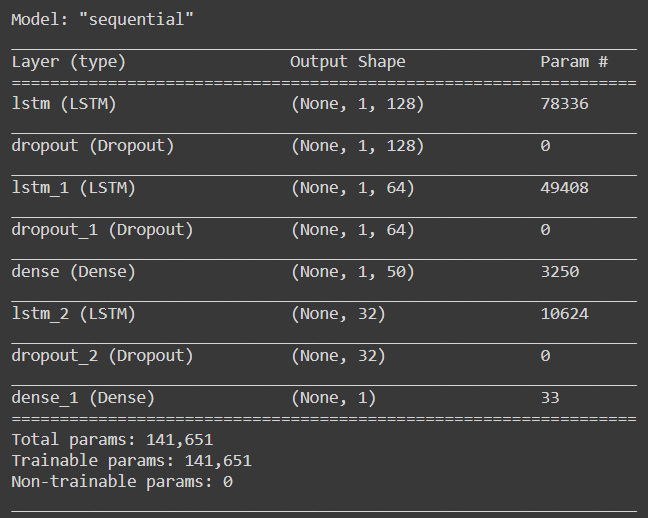

In [ ]:
def get_model(trainX):
        model = Sequential()
        model.add(LSTM(128, activation='relu',return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
        model.add(Dropout(0.4))
        model.add(LSTM(64, activation='relu',return_sequences=True))
        model.add(Dropout(0.3))
        model.add(Dense(50))
        model.add(LSTM(32, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        #print(model.summary())
        return model

## Forecasting Function

In this section, we will fit an LSTM on the multivariate input data.

* First, we must split the prepared dataset into train and test sets.
we will split the dataset into train and test sets, then splits the train and test sets into input and output variables. Finally, the inputs (X) are reshaped into the 3D format expected by LSTMs.

* The model will be fit for 100 training epochs with a batch size of 64. Remember that the internal state of the LSTM in Keras is reset at the end of each batch, so an internal state that is a function of a number of days may be helpful (try testing this).

* Finally, we keep track of both the training and test loss during training by setting the validation_data argument in the fit() function. At the end of the run both the training and test loss are plotted

After the model is fit, we can forecast for the entire test dataset.

We combine the forecast with the test dataset and invert the scaling. We also invert scaling on the test dataset .

With forecasts and actual values in their original scale, we can then calculate an error score for the model. In this case, we calculate the Root Mean Squared Error (RMSE) that gives error in the same units as the variable itself.

In [ ]:
def forecast(name,acea_df,acea_df_target):
    dataset = acea_df.copy()
    values = dataset.values
    # ensure all data is float
    values = values.astype('float32')
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    
    # frame as supervised learning
    reframed = series_to_supervised(scaled, 1, 1)
    # drop columns we don't want to predict
    cols_to_drop = [len(acea_df.columns) + acea_df.columns.get_loc(c) for c in acea_df if c not in acea_df_target]
    reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)
    values = reframed.values


    #Train Test Split
    train_size = int(len(values) * 0.7)
    test_size = len(values) - train_size

    train, test = values[0:train_size,:], values[train_size:len(values),:]
    scale = MinMaxScaler(feature_range=(0, 1))
    scale.min_,scale.scale_ = scaler.min_[0],scaler.scale_[0]

    for i in range(1,len(acea_df.columns)-len(cols_to_drop)+1):
        trainX, trainY = train[:, :len(acea_df.columns)], train[:, -i]
        testX, testY = test[:, :len(acea_df.columns)], test[:, -i]

        trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
        testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

        model = get_model(trainX)
        grads = gradient_importance(trainX, model)
        print('Mean:', np.mean(grads))
        print('Standard Deviation:', np.std(grads))

        plt.figure(figsize=(30,40))
        plt.subplot(12,3,3)  
        plt.bar(acea_df.columns,grads)
        plt.xticks(acea_df.columns, rotation=90)
        plt.legend()
        """       
        #|
        idx = np.nonzero((abs(grads) > 0.04))
        print("Selected Features - " + str(idx))

        foo = trainX[:,:,idx]
        trainX = np.squeeze(foo, axis=(1,))
        foo = testX[:,:,idx]
        testX = np.squeeze(foo, axis=(1,))
        """
        history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0, shuffle=False)
        
        yhat = model.predict(testX)
        testX = testX.reshape((testX.shape[0], testX.shape[2]))

        inv_yhat = np.concatenate((yhat, testX[:, 1:]), axis=1)
        inv_yhat = scale.inverse_transform(inv_yhat)
        inv_yhat = inv_yhat[:,0]

        testY = testY.reshape((len(testY), 1))
        inv_y = np.concatenate((testY, testX[:, 1:]), axis=1)
        inv_y = scale.inverse_transform(inv_y)
        inv_y = inv_y[:,0]

        rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
        mae = mean_absolute_error(inv_y, inv_yhat)
        print('Test RMSE: %.3f' % rmse)
        print('Test MAE: %.3f' % mae)
      
        plt.subplot(12,3,1)        
        sns.scatterplot(x=np.linspace(0,len(inv_y),num=len(inv_y)), y=inv_y, color='black',label='Actual')
        sns.scatterplot(x=np.linspace(0,len(inv_yhat),num=len(inv_yhat)), y=inv_yhat, color='green',label='predicted')
        plt.title(acea_df_target[i-1])
        plt.legend()
       
        plt.subplot(12,3,2)
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        
        actual.append(inv_y)
        predicted.append(inv_yhat)
        targets.append(acea_df_target[i-1])
        rmses.append(rmse)
        maes.append(mae)
        
    plt.show()
    return actual,predicted,targets,history,rmses,maes

**Create feature importance plot**

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the model.

The more an attribute is used to make key decisions, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

In [ ]:
def gradient_importance(seq, model):
    seq = tf.Variable(seq, dtype=tf.float32)
    with tf.GradientTape() as tape:
        predictions = model(seq)
    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    return grads

In [ ]:
actual = []
predicted = []
targets = []
rmses = []
maes = []
maes_train = []
rmses_train = []
for name,acea_df,acea_df_target in zip(dataset,all_data,all_data_target):
  actual,predicted,targets,history,rmses,maes= forecast(name,acea_df,acea_df_target)

<a id='8.1.3'></a>
### <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">8.1.3. MAE and RMSE analysis</p>


The Root Mean Square Error (RMSE) and Mean Absolute Error(MAE) re used to compare the performance of the model for predictions.

The mean square error (MSE) corresponds to the mean of the square of the prediction errors (L2– criterion method):
where m represents the number of data from the test set. This criterion measures the mean square error of the mismatch between the predicted results and the test data. A low MSE value means that the predicted values match the real values.


The root mean square error (RMSE) criterion is being used here. It is defined by: 
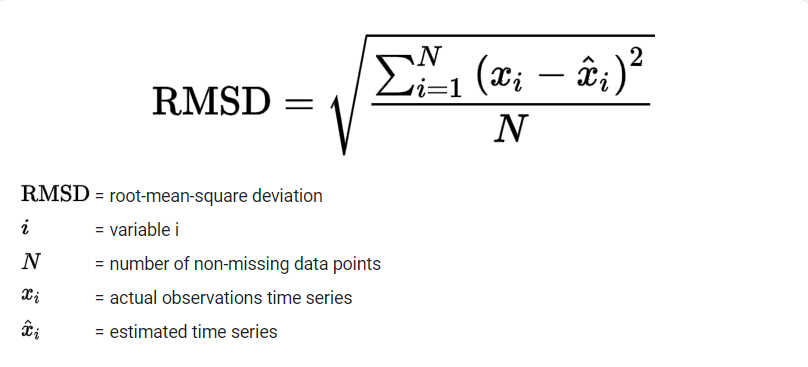

The mean absolute error (MAE) criterion (which corresponds to standard L1) is defined by:
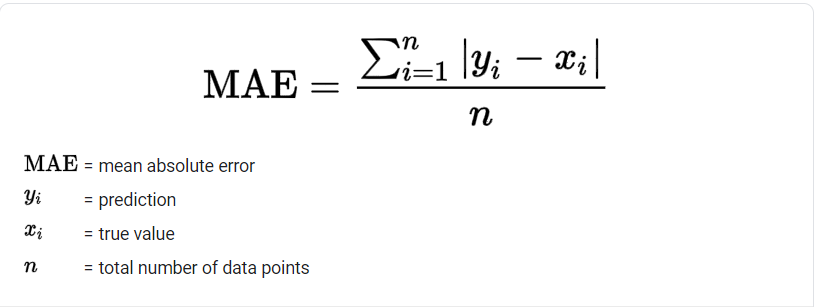

This criterion is similar to the RMSE coefficient. Nevertheless, it is more robust since it is less sensitive to extreme values than MSE.

All distance measurements (RMSE and MAE) are equivalent and make it possible to quantify how the approximated solutions match the simulated data. A small value for these criteria means that the estimated model is able to predict the values of the response of the more complex model.

In [ ]:
errors = pd.DataFrame(list(zip(rmses, maes)), 
                      index=all_targets, columns=['Test RMSE','Test MAE'])
#errors.to_csv('error.csv')
errors

<a id='8.1.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">8.1.4. Plot Predictions</p>


In [ ]:
plt.figure(figsize=(40,200))
for i,(act,pred,name) in enumerate(zip(actual,predicted,targets)):
  plt.subplot(20,2,i+1)
  sns.scatterplot(x=np.linspace(0,len(act),num=len(act)), y=act, color='black',label='Actual')
  sns.scatterplot(x=np.linspace(0,len(pred),num=len(pred)), y=pred, color='green',label='predicted')
  plt.title(name)
  plt.legend()
plt.show()

<a id='9'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">9. Conclusion</p>


* As most of the target attributes of our datasets are non-stationary in nature ARIMA model is not feasible. So, Multivariate LSTM model was used.
* LSTM outperforms the other models when we want our model to learn from long term dependencies. 
* LSTM's ability to forget, remember and update the information pushes it one step ahead of RNNs.
* The system integrates the task of developing a LSTM model from data, with the technique of searching for logical conditions that enable a better fitting error by the model.
* We think that the provided methodology is also applicable on new datasets belonging to another waterbody.